# SVM Model

Notes: 
- Trying SVM with a Linear kernal, RBF, and Poly. 
- Class weight dramtically reduces accuracy across the board. 

Final trial includes the probabilty set to True. This produces an interesting result as it shares the actual probility of each class in the prediction. Could be a more useful story in the results. 

Current predcitions with parameters create a 7% accuracy. 

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
df = pd.read_csv('citibike_data/citibike_2018.csv')

### Test of dropping tripduration:

In [115]:
df = df.drop('tripduration', axis=1)

In [116]:
df_small = df.sample(25000)

Split variables from targets: 

In [117]:
labels = df_small.stop_nhbr

Test LabelEncoder to convert target labels into a categories: 

In [118]:
le = LabelEncoder()

In [119]:
labels = le.fit_transform(labels.astype(str))
labels_removed_df = df_small.drop('stop_nhbr', axis=1)

Withouth LabelEncoder on the data: 

In [120]:
labels_removed_df = df_small.drop('stop_nhbr', axis=1)

Scale data: 

In [121]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(labels_removed_df.astype(float))

Split data into training and testing sets.  Maintain at least some of each target class in both sets with the 'stratify' argument. 

In [122]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, labels)

### Fit Linear SVM model: 

- Class_weight set to 'balanced' produced results of 0.53%

In [157]:
clf = svm.SVC(kernel='linear', random_state=42)

In [158]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [159]:
training_preds = clf.predict(X_train)

In [160]:
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 6.971%
Validation accuracy: 6.512%


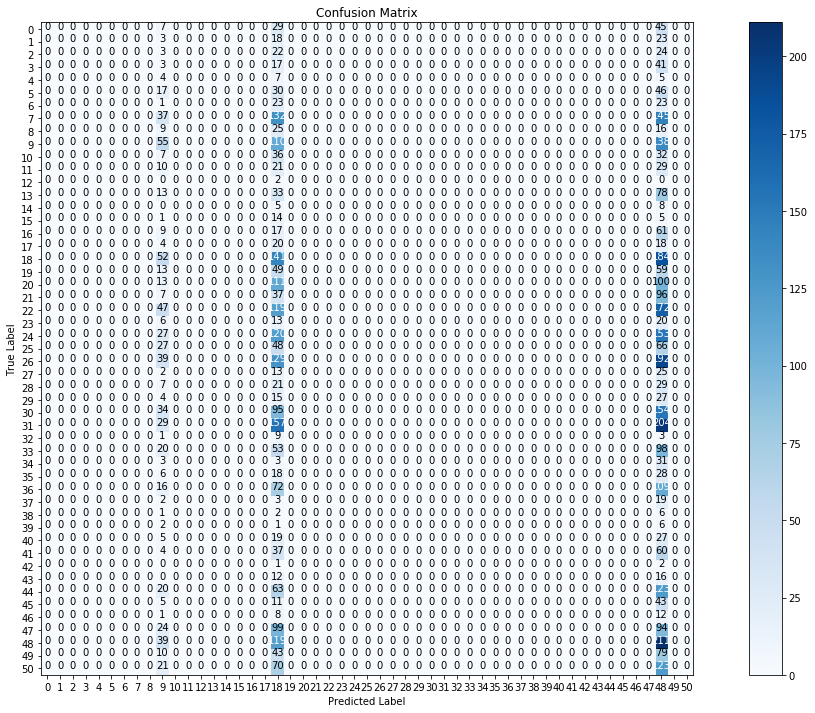

In [161]:
show_cf(y_test, val_preds)

### Fit RBF SVM model: 

- Class_weight set to 'balanced' produced results of .6%

In [162]:
clf_rbf = svm.SVC(kernel='rbf', gamma='auto', random_state=42)

In [163]:
clf_rbf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [164]:
training_preds = clf_rbf.predict(X_train)

In [165]:
val_preds = clf_rbf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 6.928%
Validation accuracy: 6.56%


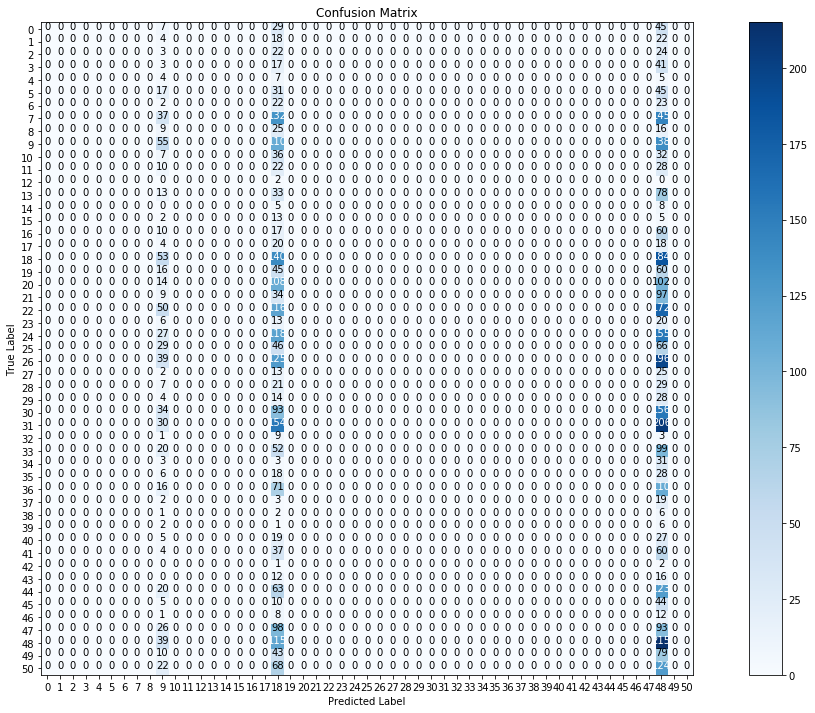

In [166]:
show_cf(y_test, val_preds)

### Fit Poly SVM Model

- Class_weight set to 'balanced' produced results of 1%

In [167]:
clf_poly = svm.SVC(kernel='poly', random_state=42, C=1, gamma='auto' )

In [168]:
clf_poly.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [169]:
training_preds = clf_poly.predict(X_train)

In [170]:
val_preds = clf_poly.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 6.859%
Validation accuracy: 6.368%


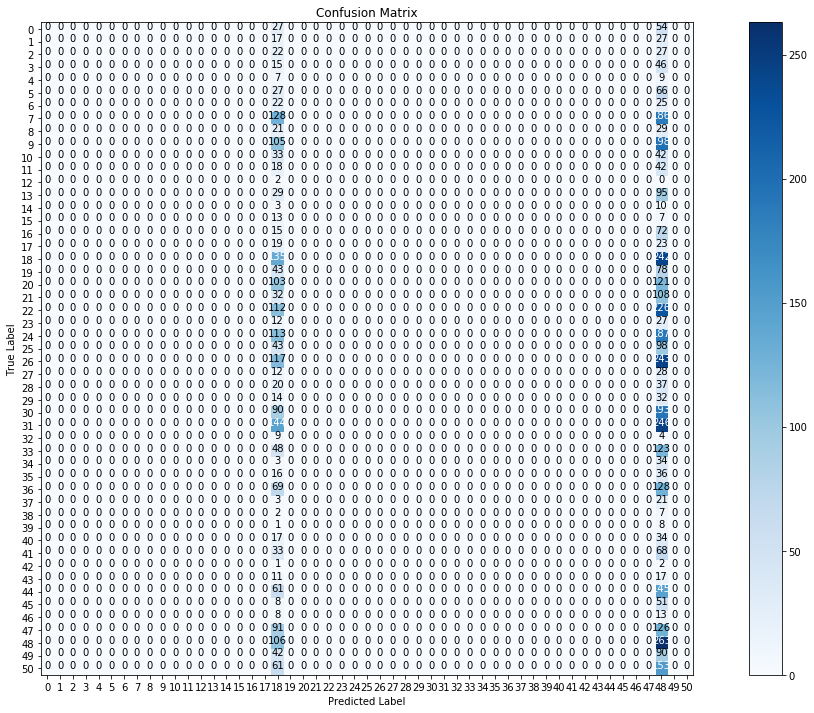

In [171]:
show_cf(y_test, val_preds)

### SVM with Probabilities: 

An interesting story to view probabilities of the final prediction. 

In [147]:
clf_prob = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', coef0=0.0, 
                    shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, 
                    verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=42)

In [148]:
clf_prob.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [149]:
training_preds = clf_prob.predict_proba(X_train )

In [ ]:
X_train.shape

In [ ]:
training_preds

In [150]:
test_preds = clf_prob.predict_proba(X_test)

In [151]:
probibilities = pd.DataFrame(test_preds, columns = clf_prob.classes_)

In [152]:
probibilities

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.012944,0.006324,0.008183,0.010560,0.002452,0.014348,0.006966,0.053100,0.009505,0.048637,...,0.017316,0.000573,0.005251,0.029093,0.008428,0.004544,0.035505,0.064827,0.020918,0.040808
1,0.013489,0.006324,0.008159,0.010482,0.002609,0.014405,0.006971,0.053310,0.010167,0.054605,...,0.016971,0.000562,0.005014,0.029494,0.008563,0.004262,0.035291,0.064321,0.021026,0.040874
2,0.013372,0.006531,0.008873,0.009776,0.002556,0.015963,0.006717,0.053722,0.007821,0.049034,...,0.017693,0.000659,0.005087,0.028406,0.007731,0.004525,0.036896,0.062986,0.020604,0.035080
3,0.013005,0.006374,0.008297,0.010636,0.002464,0.014381,0.006316,0.052466,0.010591,0.049094,...,0.017721,0.000569,0.005191,0.029403,0.008012,0.004271,0.034975,0.065066,0.021167,0.040859
4,0.013345,0.006595,0.009469,0.009997,0.002435,0.015890,0.006034,0.053801,0.011297,0.049758,...,0.017758,0.000801,0.005281,0.028763,0.006831,0.004538,0.036372,0.061821,0.020314,0.035641
5,0.013009,0.006564,0.008821,0.009665,0.002539,0.015967,0.006710,0.054605,0.008605,0.048927,...,0.017224,0.000612,0.005343,0.028408,0.007648,0.004643,0.036828,0.063280,0.020384,0.034180
6,0.013105,0.006332,0.008139,0.010445,0.002539,0.014454,0.007058,0.052862,0.007922,0.048673,...,0.017573,0.000587,0.005063,0.029105,0.008457,0.004414,0.035733,0.064951,0.021179,0.040558
7,0.013198,0.006487,0.008635,0.009894,0.002496,0.015384,0.006699,0.054072,0.011054,0.049319,...,0.017295,0.000600,0.005425,0.028916,0.007610,0.004369,0.035250,0.064023,0.020676,0.037781
8,0.013133,0.006361,0.008363,0.010501,0.002441,0.014382,0.006409,0.052740,0.011405,0.049397,...,0.017628,0.000601,0.005333,0.029295,0.007941,0.004265,0.034680,0.064685,0.021011,0.041264
9,0.013829,0.006578,0.009261,0.009893,0.002421,0.015948,0.006484,0.053398,0.010229,0.048711,...,0.017705,0.000687,0.005093,0.028405,0.007272,0.004573,0.036527,0.061966,0.020528,0.034361


In [ ]:
val_preds = clf_rbf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

### Gridsearch for better Parameters

In [95]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

svc_param_selection(X_train, y_train, 3)

# First run: {'C': 1, 'gamma': 0.1}

{'C': 1, 'gamma': 0.1}

In [96]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='poly'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

svc_param_selection(X_train, y_train, 3)

#First run: {'C': 0.01, 'gamma': 1}

{'C': 0.01, 'gamma': 1}

### Confusion Matrix

In [91]:
cf = confusion_matrix(y_test, val_preds)
cf

array([[0, 0, 3, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 8, ..., 0, 0, 6],
       [0, 0, 2, ..., 0, 0, 5],
       [0, 0, 4, ..., 0, 0, 8]])

### Plot confusion matrix

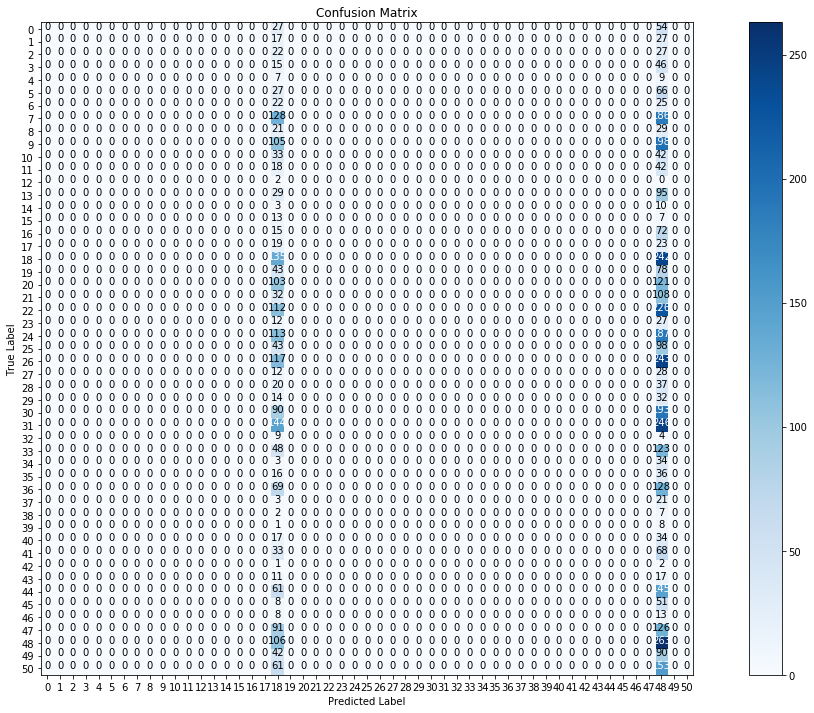

In [156]:
def show_cf(y_true, y_pred, class_names=None, model_name=None):
    plt.figure(figsize=(20,12))
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

show_cf(y_test, val_preds)

array([11, 22, 22, ..., 43, 44, 23])